In [1]:
%matplotlib notebook 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cbsyst as cb


In [2]:
filename = 'WCOA2013_hy1.csv'   #importing the data file
df = pd.read_csv(filename,header=31,
                na_values=-999,
                parse_dates=[[8,9]])

In [3]:
Csw = cb.Csys(pH=df['PH_TOT'],      #addding all the data into Csw
             TA = df['ALKALI'],
             T = df['CTDTMP'],
             S = df['CTDSAL'],
             P = df['CTDPRS'])

#type(Csw)

In [4]:
Csw.keys()  #the keys found in Csw

dict_keys(['unit', 'Ks', 'TSi', 'TP', 'P', 'S', 'T', 'Mg', 'Ca', 'BT', 'pCO2', 'fCO2', 'TA', 'CO3', 'HCO3', 'CO2', 'DIC', 'pH', 'TS', 'TF', 'H', 'CAlk', 'BAlk', 'PAlk', 'SiAlk', 'OH', 'Hfree', 'HSO4', 'HF'])

In [5]:
Csw.Ks.keys()

dict_keys(['K0', 'K1', 'K2', 'KSO4', 'KB', 'KspA', 'KspC', 'KW', 'KP1', 'KP2', 'KP3', 'KF', 'KSi'])

<IPython.core.display.Javascript object>


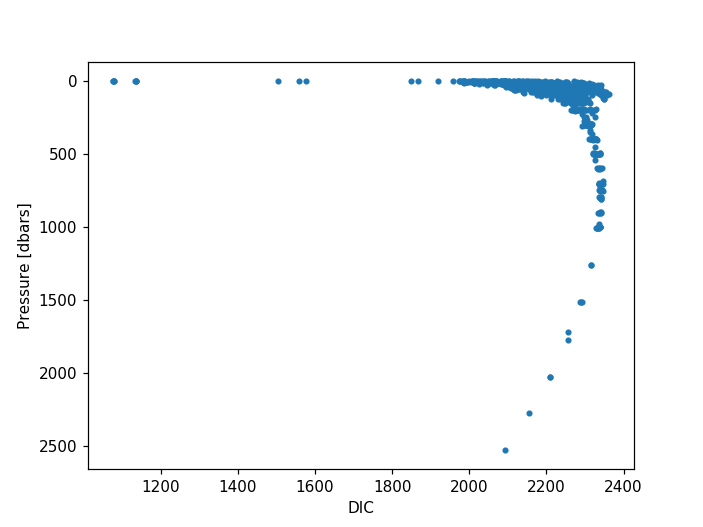

Text(0,0.5,'Pressure [dbars]')

In [6]:
plt.figure()     #plotting the DIC vs pressure
plt.plot(Csw['DIC'],df['CTDPRS'],'.')
plt.gca().invert_yaxis()
plt.xlabel('DIC')
plt.ylabel('Pressure [dbars]')

In [7]:
OmegaA = Csw['Ca']*Csw['CO3']/(Csw.Ks['KspA']*1e6)  #1e6 10 to the 6

#fidnign omega by using equation above

<IPython.core.display.Javascript object>


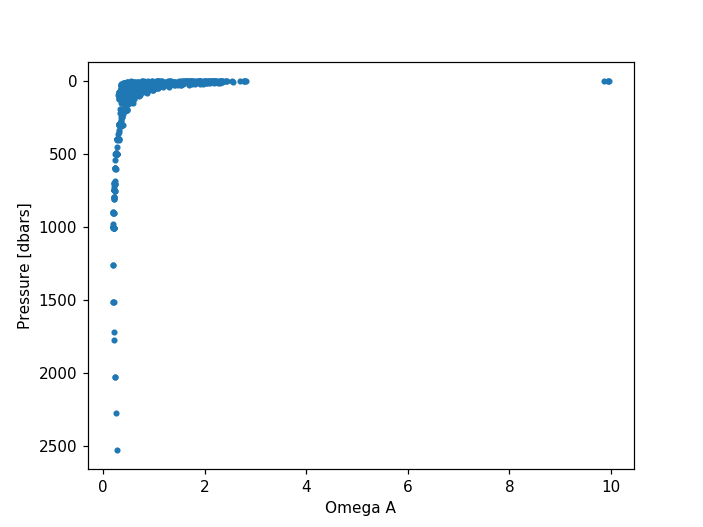

Text(0,0.5,'Pressure [dbars]')

In [8]:
#plotting omgea vs pressure
plt.figure()
plt.plot(OmegaA, df['CTDPRS'],'.')
plt.gca().invert_yaxis()
plt.xlabel('Omega A')
plt.ylabel('Pressure [dbars]')

In [9]:
df['OmegaA'] = OmegaA  #put in pandas data frame

<IPython.core.display.Javascript object>


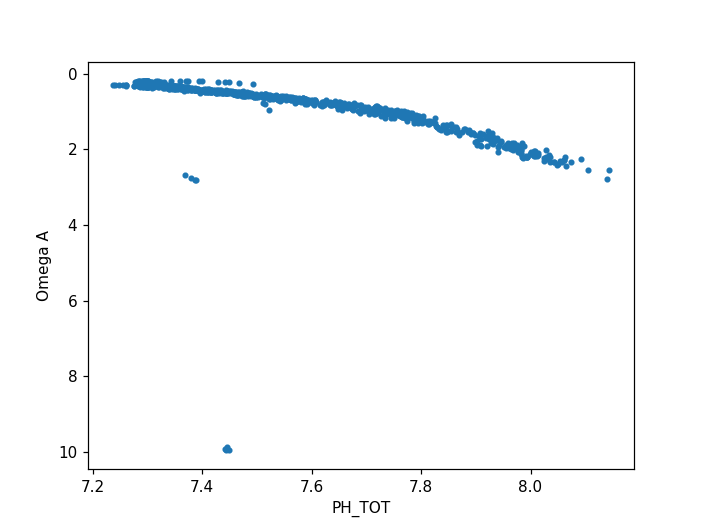

<IPython.core.display.Javascript object>


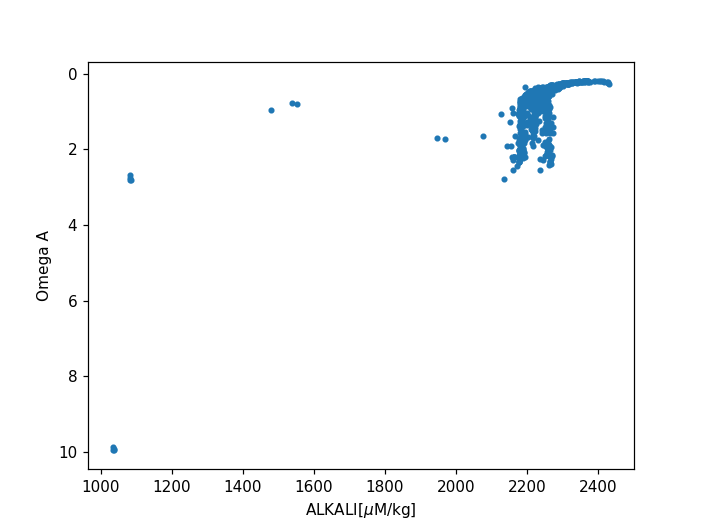

<IPython.core.display.Javascript object>


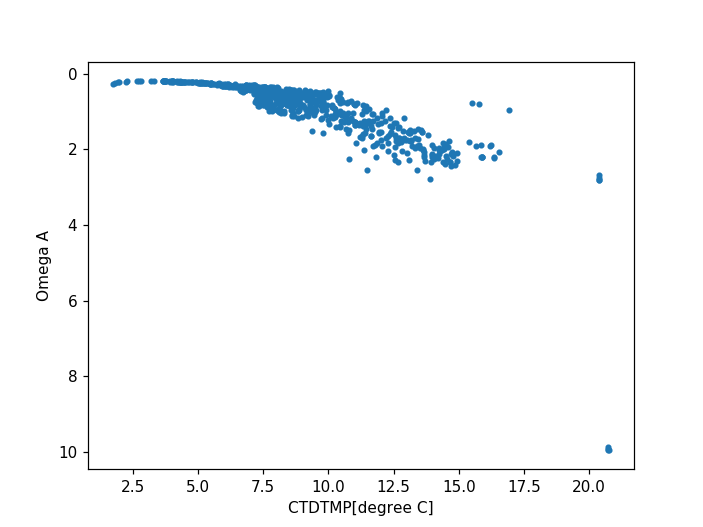

<IPython.core.display.Javascript object>


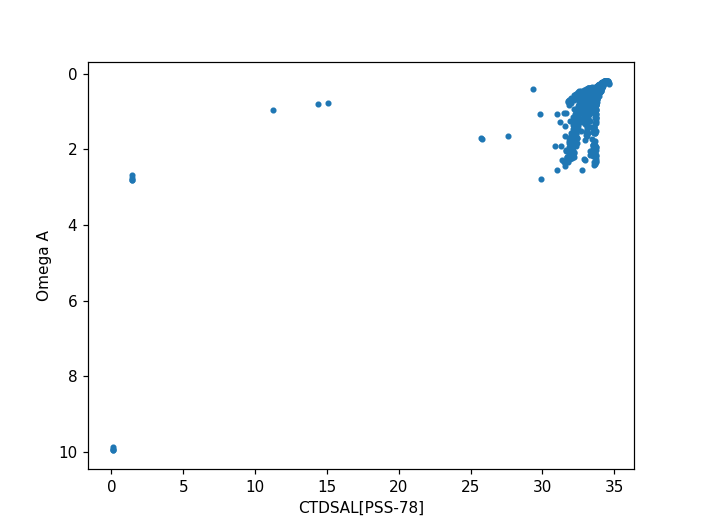

<IPython.core.display.Javascript object>


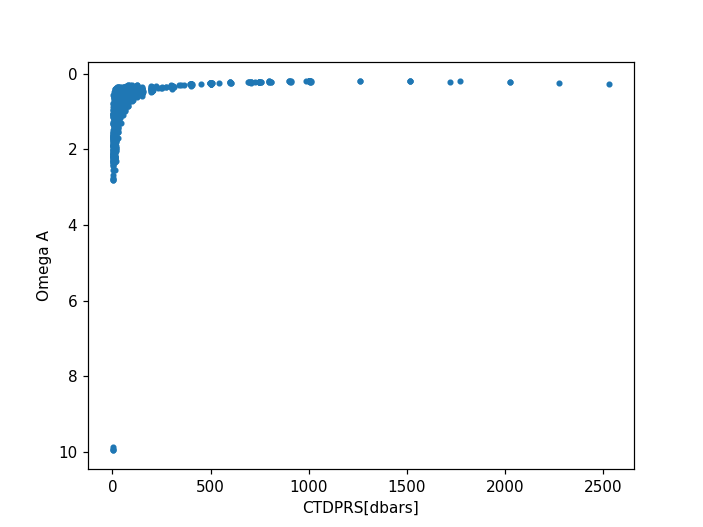

In [10]:
variables_to_plot = ['PH_TOT','ALKALI','CTDTMP','CTDSAL','CTDPRS']   #making an array of the data needed to plot to use in the for loop
units=['', '[$\mu$M/kg]','[degree C]', '[PSS-78]','[dbars]']  #making an array of units

i=0    #setting i=0 to that it will keep a count when running through loop

for var in variables_to_plot:   #writing for loop to plot the data from above 
    data=df[var]
    plt.figure()
    plt.plot(data,OmegaA,'.')    #plotting the data above vs Omega A
    plt.gca().invert_yaxis()    
    plt.xlabel(var + units[i])   #x-label will take from array above and loop through
    i=i+1     #keep adding 1 to i to get labels in correct order
    plt.ylabel('Omega A')   #y label stays constant 
    


In [11]:
#trying to figure out how to index

#ii, = np.where(df['CTDPRS']<300) and np.where(df['CTDPRS']>30)  #finding the values between these depths
#index= df(df['CTDPRS']<300) & df(df['CTDPRS']>30) & np.isfinite(OmegaA)

#oxy_finite= np.isfinite(['OXYGEN'])

#omega_array = np.array(OmegaA[ii])   #indexing for the correct depth
#response_var_finite = np.isfinite(omega_array) 
                    #& np.isfinite(['CTDTMP']) & np.isfinite(['CTDSAL']) & np.isfinite(['CTDPRS'])
                    #   & np.isfinite(['OXYGEN']) & np.isfinite(['NITRAT']))
#response_var = omega_array[oxy_finite]   #indexing to finite values

#response_var = np.array(response_var)    #converting to an array from a tuple

#print(response_var)

#print(type(response_var))


#np.linalg.lstsq(matrix_PH,response_var_PH)

In [12]:
#making an index

index = ((df['CTDPRS']<300) & (df['CTDPRS']>30) & (np.isfinite(df['CTDTMP'])) & (np.isfinite(df['CTDSAL'])) 
         & (np.isfinite(df['CTDPRS'])) & (np.isfinite(df['OXYGEN'])) & (np.isfinite(df['NITRAT'])) & (np.isfinite(df['OmegaA'])))

response_variable = np.array(OmegaA[index])   #using the index just made to index the OmegaA
#print(response_variable)
len(response_variable)     #finding the length of the response variable to find the length of the matrix
#print(type(response_variable))

290

In [13]:
number=len(response_variable)    #finding the length of the indexed variables
print(number)
matrix=np.ones([number,6])  #making a matrix of ones with the number of rows equaling the number of variables and 6 coefficeints
print(matrix)
len(matrix)  #checking the length of matrix to make sure it matches the response variable


290
[[ 1.  1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.  1.]
 ..., 
 [ 1.  1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.  1.]]


290

In [14]:
temp=np.array(df['CTDTMP'][index])   #indexing the temperature data with the index
#temp_finite=np.isfinite(temp)
#temp=temp[temp_finite]
#temperature=temp[index]

#print(temp)
#len(temp)

In [15]:
salinity=np.array(df['CTDSAL'][index])  # indexing the salinity data with the index
#sal_finite=np.isfinite(sal)
#salinity=sal[response_var_finite]
#print(salinity)
#len(salinity)

In [16]:
pressure=np.array(df['CTDPRS'][index])  #indexing the pressure data with the index
#pres_finite=np.isfinite(pres)
#pressure=pres[response_var_finite]
#print(pressure)
#len(pressure)

In [17]:
oxygen=np.array(df['OXYGEN'][index]) #indexing the oxygen data with the index
#oxy_finite=np.isfinite(oxy)
#oxygen=oxy[response_var_finite]
#print(oxygen)
#len(oxygen)


In [18]:
nitrate=np.array(df['NITRAT'][index]) #indexing the nitrate data with the  index
#nit_finite=np.isfinite(nit)
#nitrate=nit[response_var_finite]
#print(nitrate)

In [19]:
#reassigning the columns in the matrix with the correct values
matrix[:,1]=temp  #all rows in column 2 are replaced with the  temperature data
matrix[:,2]=salinity   #all rows in column 3 are replaced with the salinity data
matrix[:,3]=pressure   #all rows in column 4 are replaced with the pressure data
matrix[:,4]=oxygen    #all rows in column 5 are replaced with the oxygen data
matrix[:,5]=nitrate   #all rows in column 6 are replaced with the nitrate data
print(matrix)      #printing to check all columns were replaced

[[   1.        6.6459   33.942   202.5      75.9      34.35  ]
 [   1.        7.2983   33.474   123.8     183.       23.79  ]
 [   1.        7.3441   32.795    80.5     256.       16.14  ]
 ..., 
 [   1.       10.7555   33.647    60.5     161.5      19.69  ]
 [   1.       11.437    33.606    40.4     208.       13.67  ]
 [   1.       12.4522   33.589    30.2     254.5       8.12  ]]


In [20]:
c=np.linalg.lstsq(matrix,response_variable) #finding the coefficients for this matrix
print(c)

(array([ -3.07750516e-01,   3.19305644e-02,   2.83171680e-02,
         1.99215122e-04,   1.13431498e-03,  -1.92288348e-02]), array([ 0.62585455]), 6, array([  2.90649174e+03,   1.19459427e+03,   2.10365774e+02,
         3.74324565e+01,   1.03884693e+01,   1.32594860e-01]))


In [21]:
#help(np.linalg.lstsq)   #checking what the outputs are 

In [22]:
coefficient=c[0]   #assigning the first value in c to coefficients
coefficient[0]   #checking to make sure they are giving the right values
coefficient[1]
coefficient[2]
coefficient[3]
coefficient[4]
coefficient[5]



-0.019228834797269289

In [23]:
#pluging in the coeffiecients just found into the the equation below in order to plot
OmegaA_Model=coefficient[0]+(coefficient[1]*temp)+(coefficient[2]*salinity)+(coefficient[3]*pressure)+(coefficient[4]*oxygen)+(coefficient[5]*nitrate)
#print(OmegaA_Model)

<IPython.core.display.Javascript object>


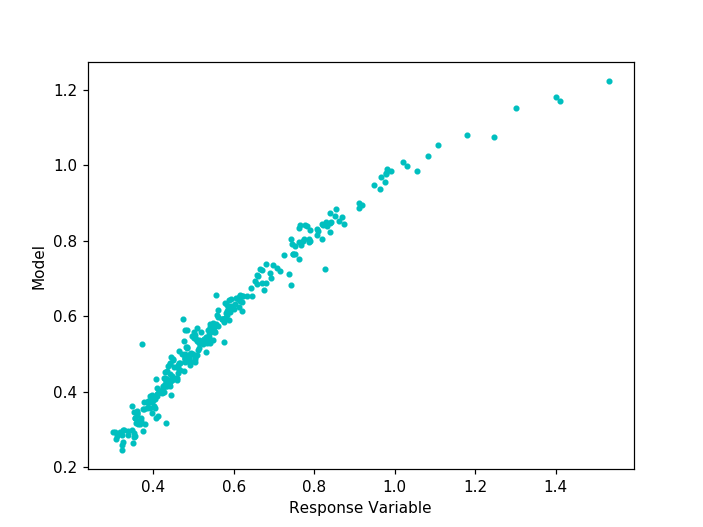

Text(0,0.5,'Model')

In [24]:
#plotting the response variables vs the new Omega A model just found above
plt.figure()
plt.plot(response_variable,OmegaA_Model,'c.')
plt.xlabel('Response Variable')
plt.ylabel('Model')

In [25]:
residual=OmegaA_Model-OmegaA[index]  #calculating the residuals by subtracting the data from the model
#print(residual)

<IPython.core.display.Javascript object>


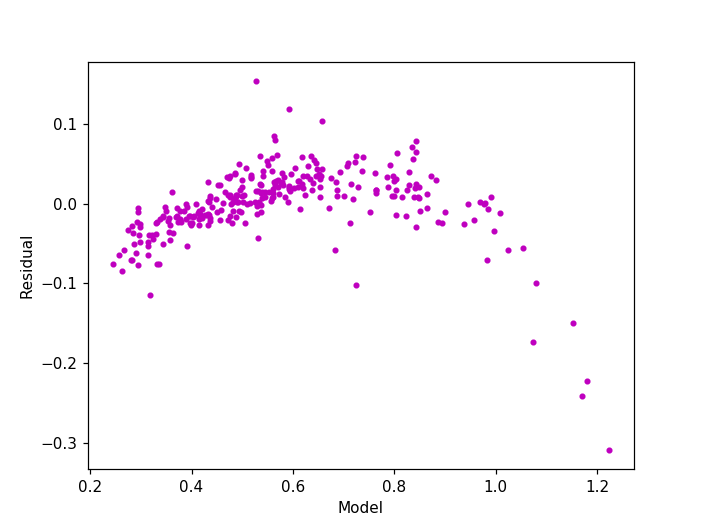

Text(0,0.5,'Residual')

In [26]:
#plotting the residuals vs the model
plt.figure()
plt.plot(OmegaA_Model, residual,'m.')
plt.xlabel('Model')
plt.ylabel('Residual')

In [27]:
import statsmodels.api as sm   #using the statsmodel package to analyze the data
res = sm.OLS(response_variable, matrix).fit()
print(res.summary())

C:\Users\cindy\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                     1073.
Date:                Thu, 08 Mar 2018   Prob (F-statistic):          4.64e-182
Time:                        17:25:30   Log-Likelihood:                 478.59
No. Observations:                 290   AIC:                            -945.2
Df Residuals:                     284   BIC:                            -923.2
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3078      0.354     -0.870      0.3

In [28]:
number=len(response_variable)    #finding the length of the indexed variables
print(number)
matrix_reference=np.ones([number,3])  #making a matrix of ones with the number of rows equaling the number of variables and 6 coefficeints
#print(matrix)
#len(matrix)


T_reference=8   #reference number for temperature
O_reference=140  #reference number for oxygen

#creating new matrix for the refernce equation
matrix_reference[:,1]=(oxygen-O_reference) #replacing all the rows in column 2 with data from oxygen minus the refernce number
matrix_reference[:,2]=(temp-T_reference)*(oxygen-O_reference)  #replacing all the rows in column 3 with data from temp minus the reference temp multiplied by oxygen minus the reference number


#print(matrix)

co=np.linalg.lstsq(matrix_reference,response_variable) #finding the coefficients for this equation
print(co)

290
(array([ 0.57416519,  0.00286187,  0.00063884]), array([ 1.90728453]), 3, array([ 1606.88349827,   951.6266608 ,    15.96532495]))


In [29]:
coefficient_reference=co[0]  #setting teh coefficients equal to coefficient_reference to use in equation below
print(coefficient_reference)

[ 0.57416519  0.00286187  0.00063884]


In [30]:
#checking to make sure values are correct
coefficient_reference[0]
coefficient_reference[1]
coefficient_reference[2]

0.00063884054465778253

In [31]:
OmegaA_reference_model=coefficient_reference[0]+(coefficient_reference[1]*(oxygen-O_reference))+(coefficient_reference[2]*((temp-T_reference)*(oxygen-O_reference)))
#plugging coefficients into equation above to graph
#print(OmegaA_reference_model)

<IPython.core.display.Javascript object>


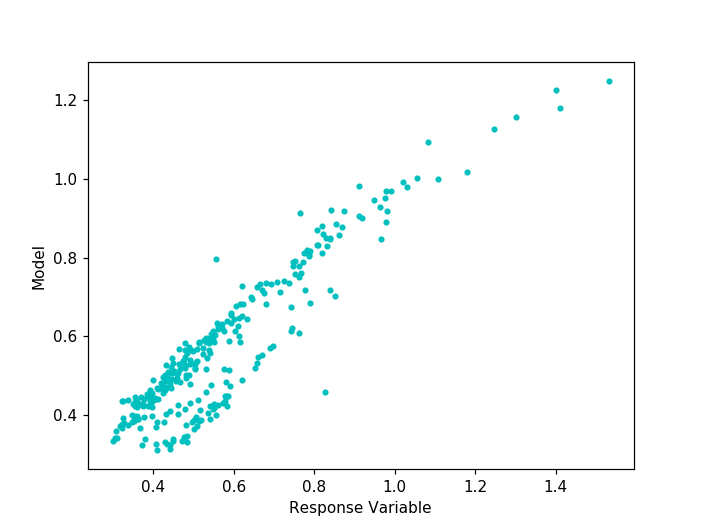

Text(0,0.5,'Model')

In [32]:
#graphing the response variable vs the new model using the reference numbers for temp and oxygen
plt.figure()
plt.plot(response_variable,OmegaA_reference_model,'c.')
plt.xlabel('Response Variable')
plt.ylabel('Model')

In [33]:
#finding the residuals for the new model using the reference equation minus the data
residual_reference=residual=OmegaA_reference_model-OmegaA[index]
#print(residual)

<IPython.core.display.Javascript object>


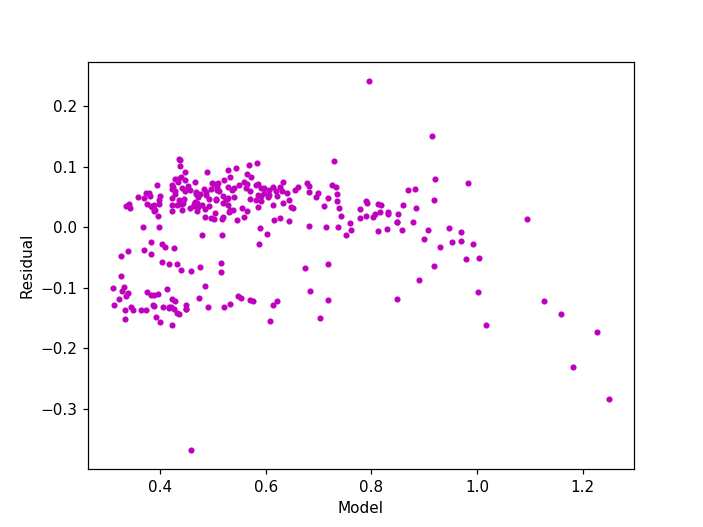

Text(0,0.5,'Residual')

In [34]:
#plotting the new model using the equation with the reference numbers vs the residual values
plt.figure()
plt.plot(OmegaA_reference_model, residual_reference,'m.')
plt.xlabel('Model')
plt.ylabel('Residual')

In [35]:
import statsmodels.api as sm    #using the statsmodel package to analyze the data
res = sm.OLS(response_variable, matrix_reference).fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     793.2
Date:                Thu, 08 Mar 2018   Prob (F-statistic):          1.22e-117
Time:                        17:25:31   Log-Likelihood:                 317.02
No. Observations:                 290   AIC:                            -628.0
Df Residuals:                     287   BIC:                            -617.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5742      0.005    112.448      0.0

The statistical significance shows an r-squared of 0.95 for the first model and an r-squared value of 0.847 for the second model. This shows that the first model is a better estimate of the data. Although, the first model has a higher r-squared value, there is colinearity assiciated with the variables used in that equation. This means that the variables have an affcet on each other, and may be biasing the model. The second equation is not associated with colinearity and could be giving a better modeled fit to the data. The first equation can be used when the variables are not being varied with each other. When there is no colinearity associated with the variables, the model will be a better guess. The second equation can be used, when there is colinearity associated with the variables and you want to make sure that does not biase the model when comparing to the data. Also when comapring the coefficients in the first equation they are different from each other and vary in magnitude, while in the second model, the coefficients are similar and have the same magnitude. This shows the second equation would be a better moodel to use, even though the r-squared value was lower. Some potential errors associated with the numbers can be that the water measured at this time was different from the water measured when the reference values were taken, leading to a different number. Also the variables used in the equation can affect the outcome if thhere is colinearity associated with them. 